In [1]:
import re, os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in","xtick.top":True,"ytick.right":True,"axes.grid":True})
%matplotlib inline

def read_file(filename):
    lines = []
    with open (filename, "r") as myfile:
        lines = [line.rstrip('\n') for line in myfile]
    return lines

def calcul_fair(values):
    '''
    @brief:
        calculate fairness
    @params:
        values: a list of values
    '''
    values = np.array(values)
    n = len(values)
    if sum(values) != 0.:
        return pow(sum(values), 2)/(n*sum(pow(values, 2)))
    else:
        return 1.

# Unit Test

In [2]:
# unit test

n_as = 2
method = 'sed'
rate = 1.00
ep = 0
dirname = os.path.join("../data/simulation", "first-impression-dump-all","1lb-2as-1worker-1stage-exp-0.20cpumu", method, "rate{:.3f}".format(rate), "")
filename = os.path.join(dirname, 'test.log'.format(ep))

In [3]:
!ls $filename

../data/simulation/first-impression-dump-all/1lb-2as-1worker-1stage-exp-0.20cpumu/sed/rate1.000/test.log


In [4]:
lines = [l for l in read_file(filename) if 'Periodic' in l]

In [5]:
fair_list = []
ratio_lo, ratio_hi = 0.01, 0.99
for l in lines[int(ratio_lo*len(lines)):int(ratio_hi*len(lines))]:
    t_rest_list = [float(s.split(' ')[-1]) for s in l.split('|')]
    fair_list.append(calcul_fair(t_rest_list))

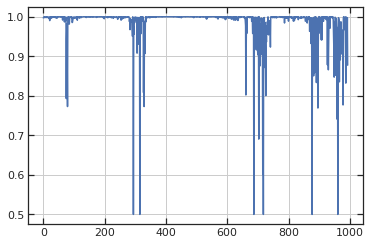

In [7]:
plt.plot(fair_list)

# Run all

In [40]:
rates = [0.645, 0.765, 0.845, 0.925, 1.]
methods = ["srt", "sed","lsq","wcmp","ecmp"]
ratio_lo, ratio_hi = 0.05, 0.95

result = {}

for rate in rates:
    result[rate] = {}
    for method in methods:
        dirname = os.path.join("../data/simulation", "first-impression-dump-all","1lb-2as-1worker-1stage-exp-0.20cpumu", method, "rate{:.3f}".format(rate), "")
        filename = os.path.join(dirname, 'test.log'.format(ep))
        
        all_lines = [l for l in read_file(filename)]
        start_idx = [i for i, l in enumerate(all_lines) if 'no flow registered' in l]
        end_idx = [i for i, l in enumerate(all_lines) if '--------------------' in l]
        assert len(start_idx) == len(end_idx)
        n_ep = len(start_idx)
        fair_list = []
        for ep in range(1):
            lines = [l for l in all_lines[int(ratio_lo*start_idx[ep]):int(ratio_hi*end_idx[ep])] if 'Periodic' in l]
            for l in lines:
                t_rest_list = [float(s.split(' ')[-1]) for s in l.split('|')]
                fair_list.append(calcul_fair(t_rest_list))
                
        result[rate][method] = fair_list

In [41]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

rate=0.645 | method=srt | Fairness Index 0.877
rate=0.645 | method=sed | Fairness Index 0.818
rate=0.645 | method=lsq | Fairness Index 0.792
rate=0.645 | method=wcmp | Fairness Index 0.751
rate=0.645 | method=ecmp | Fairness Index 0.578


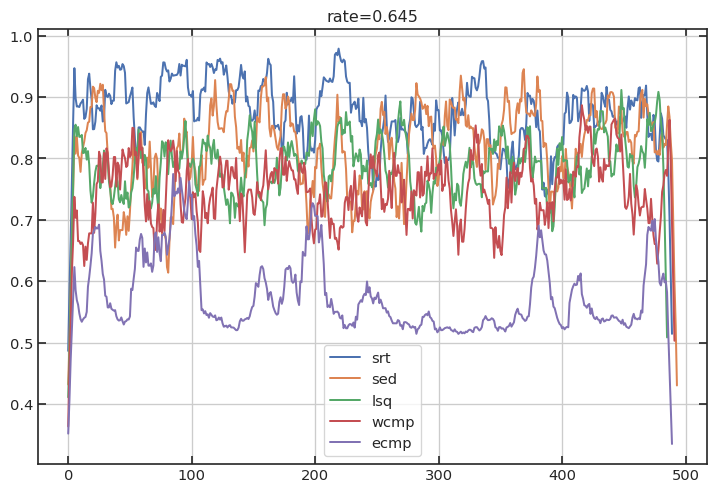

rate=0.765 | method=srt | Fairness Index 0.924
rate=0.765 | method=sed | Fairness Index 0.865
rate=0.765 | method=lsq | Fairness Index 0.797
rate=0.765 | method=wcmp | Fairness Index 0.765
rate=0.765 | method=ecmp | Fairness Index 0.513


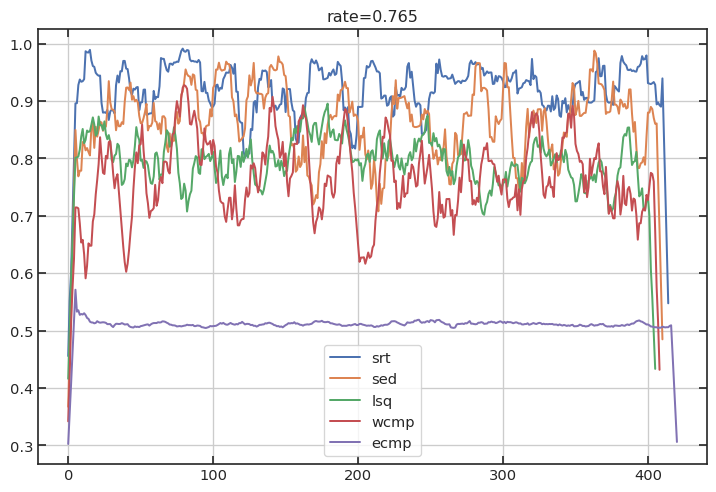

rate=0.845 | method=srt | Fairness Index 0.947
rate=0.845 | method=sed | Fairness Index 0.917
rate=0.845 | method=lsq | Fairness Index 0.792
rate=0.845 | method=wcmp | Fairness Index 0.757
rate=0.845 | method=ecmp | Fairness Index 0.518


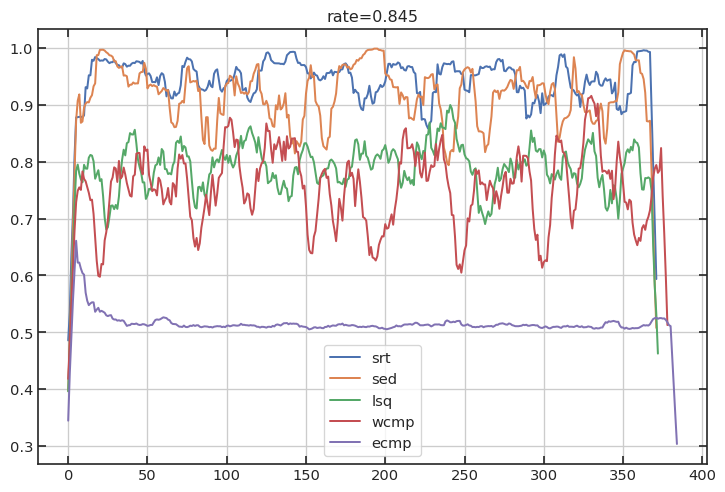

rate=0.925 | method=srt | Fairness Index 0.964
rate=0.925 | method=sed | Fairness Index 0.956
rate=0.925 | method=lsq | Fairness Index 0.806
rate=0.925 | method=wcmp | Fairness Index 0.800
rate=0.925 | method=ecmp | Fairness Index 0.519


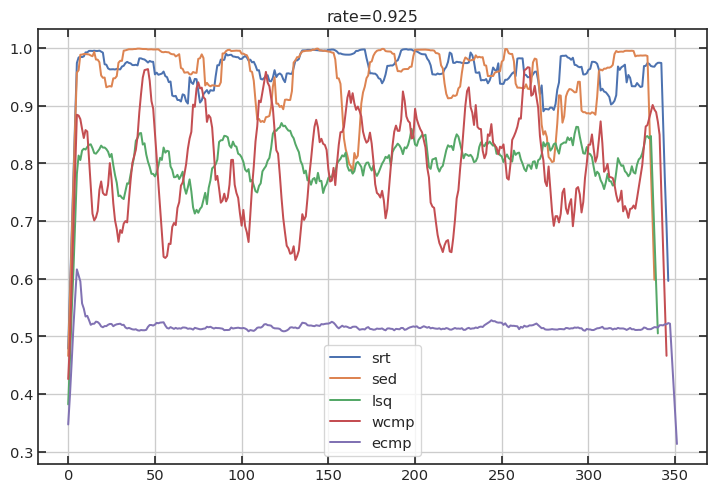

rate=1.000 | method=srt | Fairness Index 0.999
rate=1.000 | method=sed | Fairness Index 0.992
rate=1.000 | method=lsq | Fairness Index 0.858
rate=1.000 | method=wcmp | Fairness Index 0.784
rate=1.000 | method=ecmp | Fairness Index 0.524


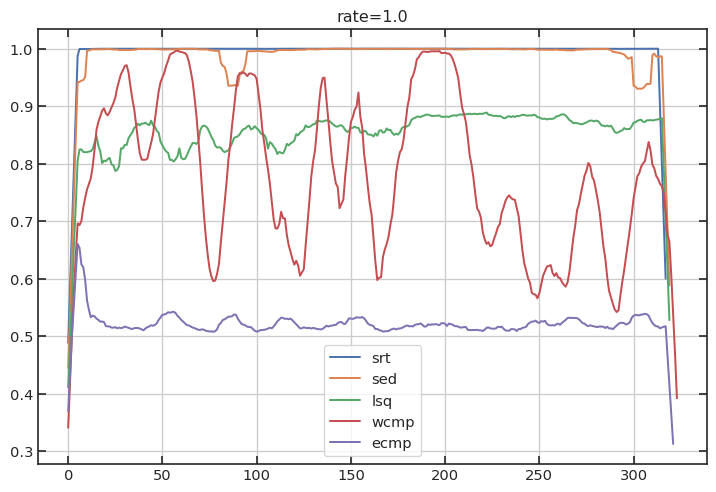

In [43]:
for rate, tuples in result.items():
    fig = plt.figure(figsize=(9, 6), dpi=96)
    for method, values in tuples.items():
        plt.plot(smooth(values, 10), label=method)
        print('rate={:.3f} | method={} | Fairness Index {:.3f}'.format(rate, method, np.mean(values)))
    plt.legend()
    plt.title('rate={}'.format(rate))
    plt.show()

# Plot for 100% utilization

In [23]:
COLORS = ["#3978af", 
          "#559d3f",
          "#d1342b",
          "#ef8532", 
          "#634295", 
          "#a65d34", 
          "#aecde1", 
          "#b4dc93",
          "#ee9e9b", 
          "#f4c07b", 
          "#c6b4d3",
          "#fffea6",
          "#df3583"]

In [15]:
lines = [l.split(':')[-1] for l in read_file(filename) if 'Actual On Flow' in l]

In [18]:
[int(i) for i in lines[0].split('|')]

[0, 0]

In [ ]:
rate = 1

In [19]:
t_rest_list

[0.038393, 6.219784]

In [28]:
result = {}
result_grp1 = {}
result_grp2 = {}

for method in methods:
    dirname = os.path.join("../data/simulation", "first-impression-dump-all","1lb-2as-1worker-1stage-exp-0.20cpumu", method, "rate{:.3f}".format(rate), "")
    filename = os.path.join(dirname, 'test.log'.format(ep))

    all_lines = [l for l in read_file(filename)]
    start_idx = [i for i, l in enumerate(all_lines) if 'no flow registered' in l]
    end_idx = [i for i, l in enumerate(all_lines) if '--------------------' in l]
    assert len(start_idx) == len(end_idx)
    n_ep = len(start_idx)
    t_rest_grp1_list = []
    t_rest_grp2_list = []
    for ep in range(1):
        lines = [l for l in all_lines[int(ratio_lo*start_idx[ep]):int(ratio_hi*end_idx[ep])] if 'Periodic' in l]
        for l in lines[int(ratio_lo*len(lines)):int(ratio_hi*len(lines))]:
            t_rest_list = [float(s.split(' ')[-1]) for s in l.split('|')]
            t_rest_grp1_list.append(t_rest_list[0])
            t_rest_grp2_list.append(t_rest_list[1])

    result_grp1[method] = t_rest_grp1_list
    result_grp2[method] = t_rest_grp2_list

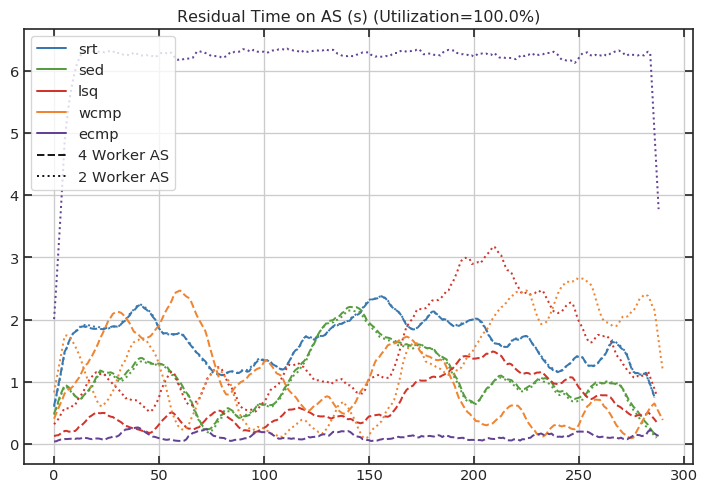

In [33]:
fig = plt.figure(figsize=(9, 6), dpi=96)
for i, method in enumerate(methods):
    plt.plot(smooth(result_grp1[method], 10), color=COLORS[i], linestyle='--')
    plt.plot(smooth(result_grp2[method], 10), color=COLORS[i], linestyle=':')
    plt.plot(0,0, color=COLORS[i], label=method)
plt.plot(0, 0, color='k', linestyle='--', label='4 Worker AS')
plt.plot(0, 0, color='k', linestyle=':', label='2 Worker AS')
plt.legend()
plt.title('Residual Time on AS (s) (Utilization={:.1%})'.format(rate))
plt.show()

In [36]:
result = {}
result_grp1 = {}
result_grp2 = {}

for method in methods:
    dirname = os.path.join("../data/simulation", "first-impression-dump-all","1lb-2as-1worker-1stage-exp-0.20cpumu", method, "rate{:.3f}".format(rate), "")
    filename = os.path.join(dirname, 'test.log'.format(ep))

    all_lines = [l for l in read_file(filename)]
    start_idx = [i for i, l in enumerate(all_lines) if 'no flow registered' in l]
    end_idx = [i for i, l in enumerate(all_lines) if '--------------------' in l]
    assert len(start_idx) == len(end_idx)
    n_ep = len(start_idx)
    qlen_grp1_list = []
    qlen_grp2_list = []
    for ep in range(1):
        lines = [l.split(':')[-1] for l in all_lines[int(ratio_lo*start_idx[ep]):int(ratio_hi*end_idx[ep])] if 'Actual On Flow' in l]
        for l in lines[int(ratio_lo*len(lines)):int(ratio_hi*len(lines))]:
            qlen_list = [int(s) for s in l.split('|')]
            qlen_grp1_list.append(qlen_list[0])
            qlen_grp2_list.append(qlen_list[1])

    result_grp1[method] = qlen_grp1_list
    result_grp2[method] = qlen_grp2_list

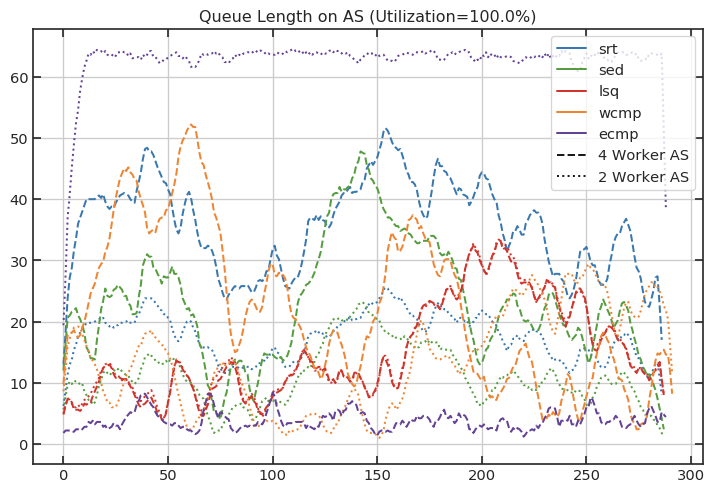

In [39]:
fig = plt.figure(figsize=(9, 6), dpi=96)
for i, method in enumerate(methods):
    plt.plot(smooth(result_grp1[method], 5), color=COLORS[i], linestyle='--')
    plt.plot(smooth(result_grp2[method], 5), color=COLORS[i], linestyle=':')
    plt.plot(0,0, color=COLORS[i], label=method)
plt.plot(0, 0, color='k', linestyle='--', label='4 Worker AS')
plt.plot(0, 0, color='k', linestyle=':', label='2 Worker AS')
plt.legend()
plt.title('Queue Length on AS (Utilization={:.1%})'.format(rate))
plt.show()

# Check RLB SAC performance

In [44]:
rates = [0.645, 0.765, 0.845, 0.925, 1.]
methods = ["srt", "sed","lsq","wcmp","ecmp", "rlb-sac"]
ratio_lo, ratio_hi = 0.05, 0.95

result = {}

for rate in rates:
    result[rate] = {}
    for method in methods:
        dirname = os.path.join("../data/simulation", "first-impression-dump-all","1lb-2as-1worker-1stage-exp-0.20cpumu", method, "rate{:.3f}".format(rate), "")
        filename = os.path.join(dirname, 'test.log'.format(ep))
        
        all_lines = [l for l in read_file(filename)]
        start_idx = [i for i, l in enumerate(all_lines) if 'no flow registered' in l]
        end_idx = [i for i, l in enumerate(all_lines) if '--------------------' in l]
        assert len(start_idx) == len(end_idx)
        n_ep = len(start_idx)
        fair_list = []
        for ep in range(1):
            lines = [l for l in all_lines[int(ratio_lo*start_idx[ep]):int(ratio_hi*end_idx[ep])] if 'Periodic' in l]
            for l in lines:
                t_rest_list = [float(s.split(' ')[-1]) for s in l.split('|')]
                fair_list.append(calcul_fair(t_rest_list))
                
        result[rate][method] = fair_list

In [45]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

rate=0.645 | method=srt | Fairness Index 0.877
rate=0.645 | method=sed | Fairness Index 0.818
rate=0.645 | method=lsq | Fairness Index 0.792
rate=0.645 | method=wcmp | Fairness Index 0.751
rate=0.645 | method=ecmp | Fairness Index 0.578
rate=0.645 | method=rlb-sac | Fairness Index 0.745


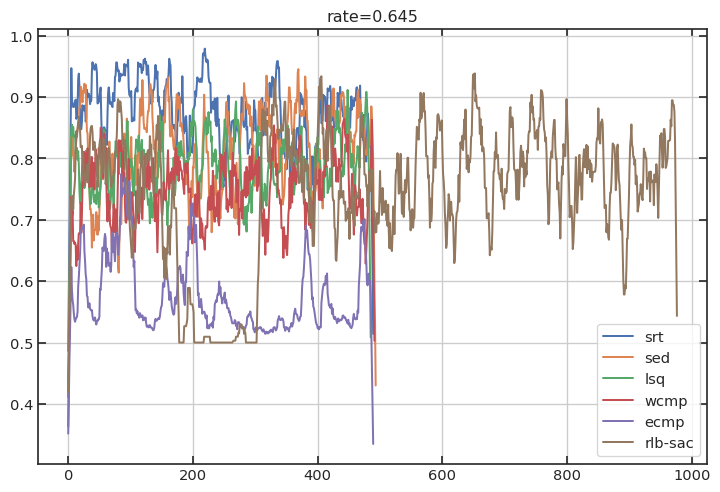

rate=0.765 | method=srt | Fairness Index 0.924
rate=0.765 | method=sed | Fairness Index 0.865
rate=0.765 | method=lsq | Fairness Index 0.797
rate=0.765 | method=wcmp | Fairness Index 0.765
rate=0.765 | method=ecmp | Fairness Index 0.513
rate=0.765 | method=rlb-sac | Fairness Index 0.810


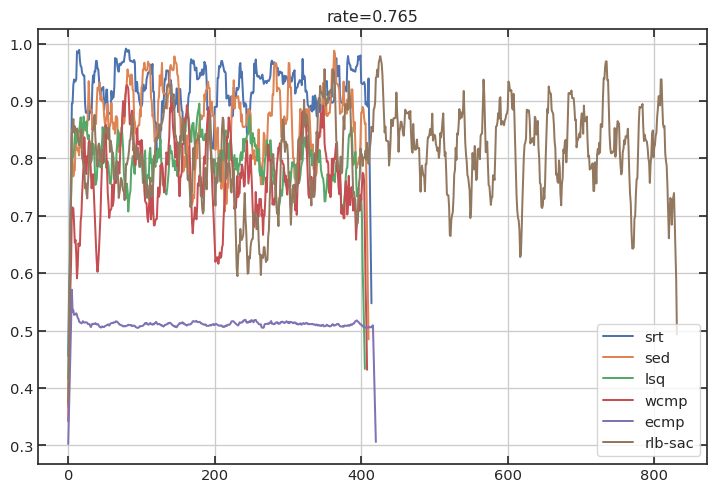

rate=0.845 | method=srt | Fairness Index 0.947
rate=0.845 | method=sed | Fairness Index 0.917
rate=0.845 | method=lsq | Fairness Index 0.792
rate=0.845 | method=wcmp | Fairness Index 0.757
rate=0.845 | method=ecmp | Fairness Index 0.518
rate=0.845 | method=rlb-sac | Fairness Index 0.770


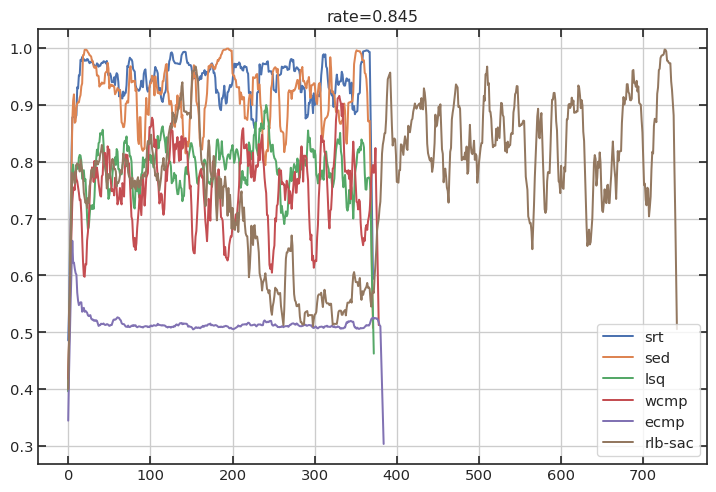

rate=0.925 | method=srt | Fairness Index 0.964
rate=0.925 | method=sed | Fairness Index 0.956
rate=0.925 | method=lsq | Fairness Index 0.806
rate=0.925 | method=wcmp | Fairness Index 0.800
rate=0.925 | method=ecmp | Fairness Index 0.519
rate=0.925 | method=rlb-sac | Fairness Index 0.805


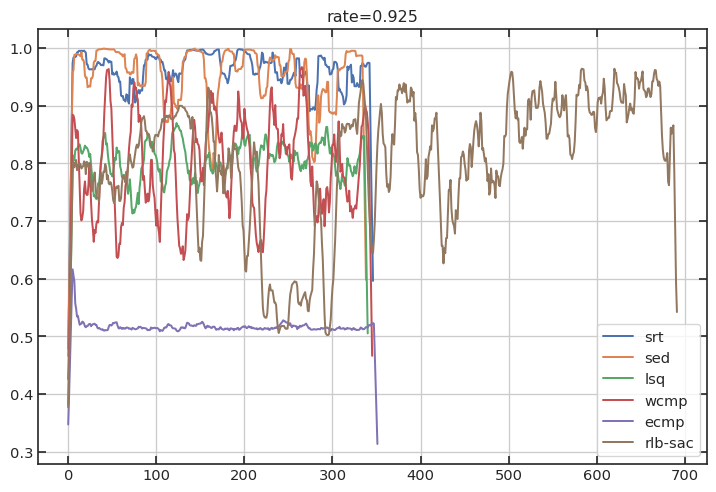

rate=1.000 | method=srt | Fairness Index 0.999
rate=1.000 | method=sed | Fairness Index 0.992
rate=1.000 | method=lsq | Fairness Index 0.858
rate=1.000 | method=wcmp | Fairness Index 0.784
rate=1.000 | method=ecmp | Fairness Index 0.524
rate=1.000 | method=rlb-sac | Fairness Index 0.900


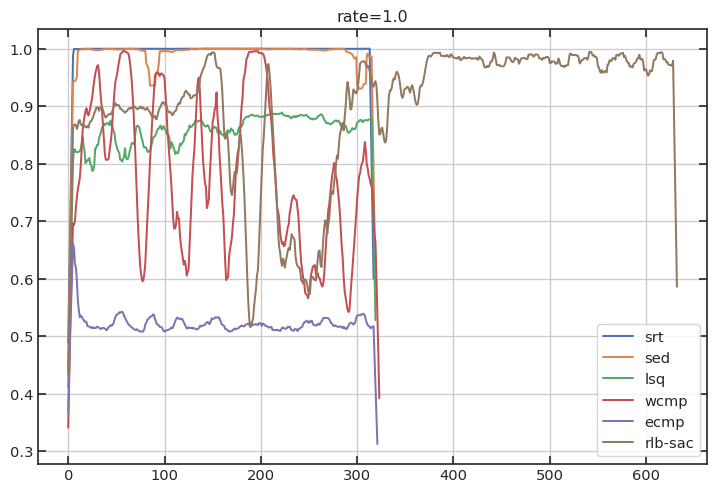

In [46]:
for rate, tuples in result.items():
    fig = plt.figure(figsize=(9, 6), dpi=96)
    for method, values in tuples.items():
        plt.plot(smooth(values, 10), label=method)
        print('rate={:.3f} | method={} | Fairness Index {:.3f}'.format(rate, method, np.mean(values)))
    plt.legend()
    plt.title('rate={}'.format(rate))
    plt.show()

## Plot reward

In [48]:
all_lines[:20]

['unit traffic rate for current setup: 30.0',
 'no flow registered',
 '[2021-09-27 12:46:30,098] ### Init. Logger rl-logger ###',
 'cpu',
 'DEBUG: step_delay train 0.024s',
 '[2021-09-27 12:46:30,132] ==========',
 '[2021-09-27 12:46:30,132] LB Node:                      lb0',
 '[2021-09-27 12:46:30,132] Time:                         0.043834s',
 '[2021-09-27 12:46:30,132] Sim. Time:                    0.024005s',
 '[2021-09-27 12:46:30,134] Latest Reward:                0.0',
 '[2021-09-27 12:46:30,134] feature_lb:                   res_iat_f_lb_avg: 0.000, res_iat_f_lb_std: 0.000, res_iat_f_lb_p90: 0.000, res_iat_f_lb_avg_disc: 0.000, res_iat_f_lb_avg_decay: 0.000',
 '[2021-09-27 12:46:30,134] Latest active ASs:                   0 |       1',
 '[2021-09-27 12:46:30,135] #apache obs.:                        0 |       0',
 '[2021-09-27 12:46:30,135] fd_res_avg.:                     0.000 |   0.000',
 '[2021-09-27 12:46:30,135] fct_res_avg.:                    0.000 |   0.000',
 '[2021

In [50]:
rates = [0.645, 0.765, 0.845, 0.925, 1.]
method = "rlb-sac"
ratio_lo, ratio_hi = 0.05, 0.95

result = {}

for rate in rates:
    result[rate] = {}
    dirname = os.path.join("../data/simulation", "first-impression-dump-all","1lb-2as-1worker-1stage-exp-0.20cpumu", method, "rate{:.3f}".format(rate), "")
    filename = os.path.join(dirname, 'test.log'.format(ep))

    all_lines = [l for l in read_file(filename)]
    start_idx = [i for i, l in enumerate(all_lines) if 'no flow registered' in l]
    end_idx = [i for i, l in enumerate(all_lines) if '--------------------' in l]
    assert len(start_idx) == len(end_idx)
    n_ep = len(start_idx)
    reward_list = []
    for ep in range(1):
        lines = [l for l in all_lines[int(ratio_lo*start_idx[ep]):int(ratio_hi*end_idx[ep])] if 'Latest Reward' in l]
        for l in lines:
            reward_list.append(float(l.split(' ')[-1]))

    result[rate] = reward_list

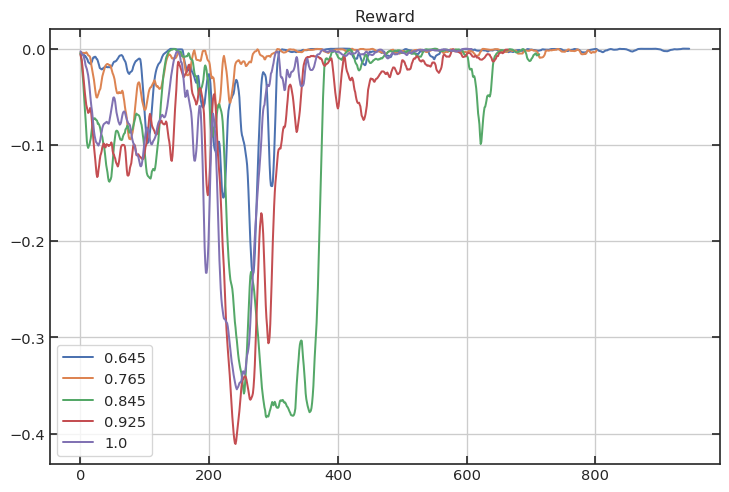

In [51]:
fig = plt.figure(figsize=(9, 6), dpi=96)
for rate, values in result.items():
    plt.plot(smooth(values, 10), label=rate)
plt.legend()
plt.title('Reward'.format(rate))
plt.show()